In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = Path("../../data/generation")

In [3]:
generated_datafiles = path.glob("*.csv")

In [4]:
frames = [pd.read_csv(fp) for fp in generated_datafiles]

In [5]:
type(frames[0]), len(frames)

(pandas.core.frame.DataFrame, 10)

In [6]:
result = pd.concat(frames)

In [7]:
result.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [8]:
result.shape

(40432, 4)

In [10]:
result.to_csv("../../data/classification/data.csv", index=None)

In [11]:
result["sentenceLength"] = result["text_"].apply(lambda x: len(x.split(" ")))

/home/lazylearner/anaconda3/envs/amazonreviews/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Reviews')

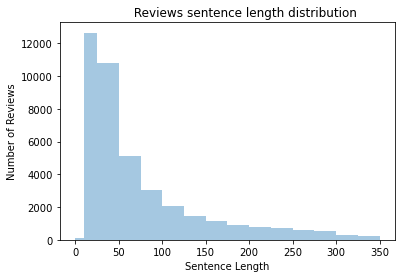

In [12]:
sns.distplot(a=result["sentenceLength"], kde=False, bins=[0,10,25,50,75,100,125,150,175,200,225,250,275,300,325,350])
plt.title("         Reviews sentence length distribution")
plt.xlabel("Sentence Length")
plt.ylabel("Number of Reviews")

Text(0.5, 1.0, '        Review counts by categories')

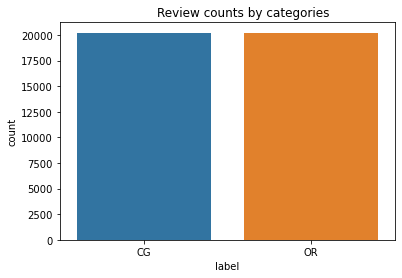

In [13]:
sns.countplot(data=result, x="label")
plt.title("        Review counts by categories")
# plt.yticks(rotation=45)